# 1.4.10 Histograms in OpenCV

In [14]:
import cv2
import numpy as np

img = cv2.imread('beach-438500_1280.jpg',0)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#1. Histogram Calculation in OpenCV
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.size
#hist는 0~255의 칼라값

256

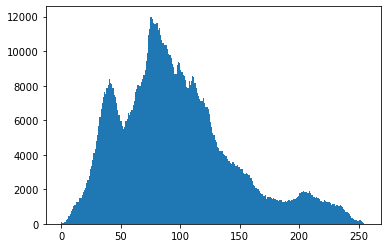

In [22]:
from matplotlib import pyplot as plt

#2. Histogram Calculation in Numpy
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.hist(img.ravel(),256,[0,256]); plt.show()

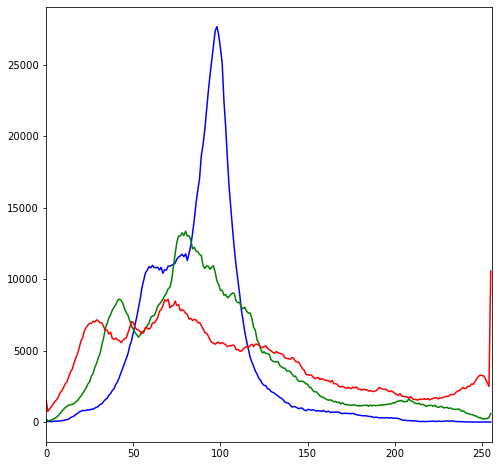

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#그레이가 아닌 칼라로 읽었을경우
img = cv2.imread('beach-438500_1280.jpg')
color = ('b','g','r')
plt.figure(figsize=[8,8])
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [31]:
img.shape

(853, 1280, 3)

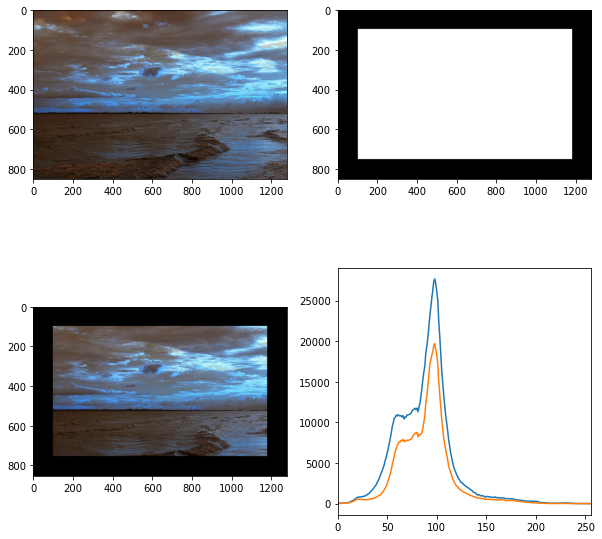

In [34]:
img = cv2.imread('beach-438500_1280.jpg')
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:753, 100:1180] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=[10,10])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


# Histograms - 2: Histogram Equalization

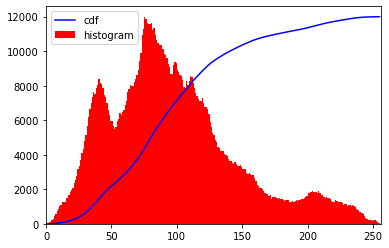

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beach-438500_1280.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [36]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


In [37]:
img2 = cdf[img]

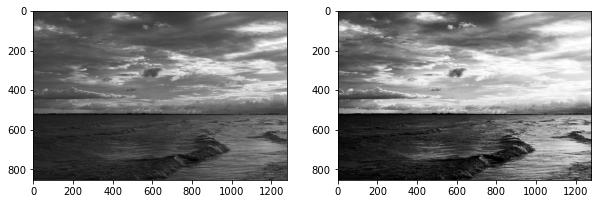

In [39]:
plt.figure(figsize=[10,10])
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()
#하얀건 더하얗게 까만건 더 까맣게

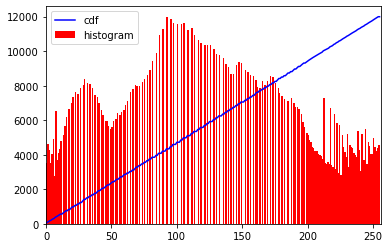

In [41]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
#cdf직선, 히스토그램도 많이 평등해짐

# Histograms Equalization in OpenCV


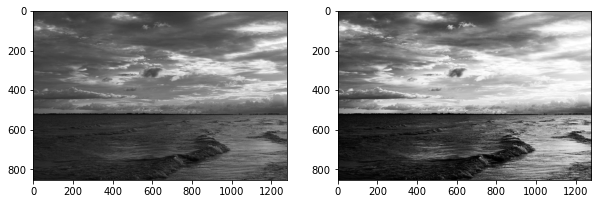

In [46]:
#짧은코드로

img = cv2.imread('beach-438500_1280.jpg',0)
equ = cv2.equalizeHist(img) #오픈cv함수 한줄

plt.figure(figsize=[10,10])
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(equ,'gray')
plt.show()

In [47]:
#이미지 두개를 붙여줌
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()